# Load the Data


### 🔹 Importing Libraries and Configuring Display Options

This section imports essential Python libraries used for data analysis and visualization:

- **pandas** → for data manipulation and analysis.  
- **numpy** → for numerical operations and array handling.  
- **matplotlib.pyplot** and **seaborn** → for creating plots and visualizations.  

Additionally, `pd.set_option('display.max_columns', None)` ensures that all columns are displayed when viewing DataFrames, making exploration easier.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

### 🔹 Loading Datasets

This step loads the project’s CSV files into pandas DataFrames for analysis.

- **`train.csv`** → contains historical sales data.  
- **`features.csv`** → includes additional variables such as temperature, fuel price, and CPI.  
- **`stores.csv`** → provides store-related information like type and size.  
- **`test.csv`** → used for evaluating or predicting future sales.  

Each file is read using `pd.read_csv()`, preparing the data for subsequent preprocessing and exploration.


In [8]:
train = pd.read_csv('train.csv')
features = pd.read_csv('features.csv')
stores = pd.read_csv('stores.csv')
test = pd.read_csv('test.csv')

# Convert Date Columns to datetime

### 🔹 Converting Date Columns to Datetime Format

This step converts the `Date` columns in both the `train` and `features` datasets to **datetime** objects using `pd.to_datetime()`.

- Ensures consistent date formatting across datasets.  
- Enables time-based operations such as merging, resampling, and feature extraction (e.g., year, month, week).  
- Essential for accurate alignment of data in later analysis steps.


In [9]:
train['Date'] = pd.to_datetime(train['Date'])
features['Date'] = pd.to_datetime(features['Date'])


# Merge the Datasets (Feature , Store with Train)


### 🔹 Combining Feature and Store Data

This step merges the `features` dataset with the `stores` dataset using **Store** as the common key.

- **`how='left'`** keeps all records from the `features` dataset.  
- Adds store-specific details (such as store type or size) to the feature data.  
- Creates a new combined dataset named `feature_store` for later merging with training and test data.


In [10]:
feature_store = pd.merge(features, stores, on='Store', how='left')


### 🔹 Merging Training Data with Feature-Store Information

This step merges the `train` dataset with the `feature_store` dataset using **Store**, **Date**, and **IsHoliday** as common keys.

- **`how='left'`** ensures all rows from the `train` dataset are retained.  
- Combines sales data with related store and feature attributes.  
- Produces a comprehensive dataset named `train_merged` for further analysis and modeling.


In [11]:
train_merged= pd.merge(train, feature_store, on=['Store', 'Date', 'IsHoliday'], how='left')


### 🔹 Sorting the Training Dataset

This step sorts the `test_merged` dataset by **Store**, **Dept**, and **Date** in ascending order.

- Ensures that data for each store and department is arranged **chronologically**.  
- Facilitates **time-series analysis** and consistent processing across records.  
- The index is reset after sorting to maintain a clean, sequential order.  
- Displays the sorted dataset for verification.


In [12]:
train_merged = train_merged.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)
train_merged

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421565,45,98,2012-09-28,508.37,False,64.88,3.997,4556.61,20.64,1.50,1601.01,3288.25,192.013558,8.684,B,118221
421566,45,98,2012-10-05,628.10,False,64.89,3.985,5046.74,NaN,18.82,2253.43,2340.01,192.170412,8.667,B,118221
421567,45,98,2012-10-12,1061.02,False,54.47,4.000,1956.28,NaN,7.89,599.32,3990.54,192.327265,8.667,B,118221
421568,45,98,2012-10-19,760.01,False,56.47,3.969,2004.02,NaN,3.18,437.73,1537.49,192.330854,8.667,B,118221


## 📊 Exploratory Data Analysis (EDA)

### 🔹 Creating a Copy of the Dataset

This step creates a **copy** of the `train_merged` dataset using the `copy()` method.

- Ensures that any modifications made afterward do not affect the original data reference.  
- Helps avoid unintended side effects when performing transformations or feature engineering.  
- Common practice before major preprocessing or analysis steps.


In [13]:
train_merged = train_merged.copy()

### 🔹 Cube Root Transformation and Outlier Detection

This step applies a cube root transformation to reduce skewness in the `Weekly_Sales` data and then detects outliers using the IQR method.

- **Removed non-positive sales values** to avoid issues with transformation.  
- **Applied cube root (`np.cbrt`) transformation** to make the distribution more normal-like.  
- **Compared histograms** before and after transformation to visualize the effect.  
- **Calculated Q1, Q3, and IQR** to define outlier boundaries.  
- **Detected and counted outliers**, then computed their percentage.  

This helps to understand the data’s spread and identify extreme values that might affect model performance.


Number of outliers: 3005
Percentage of outliers: 0.72%


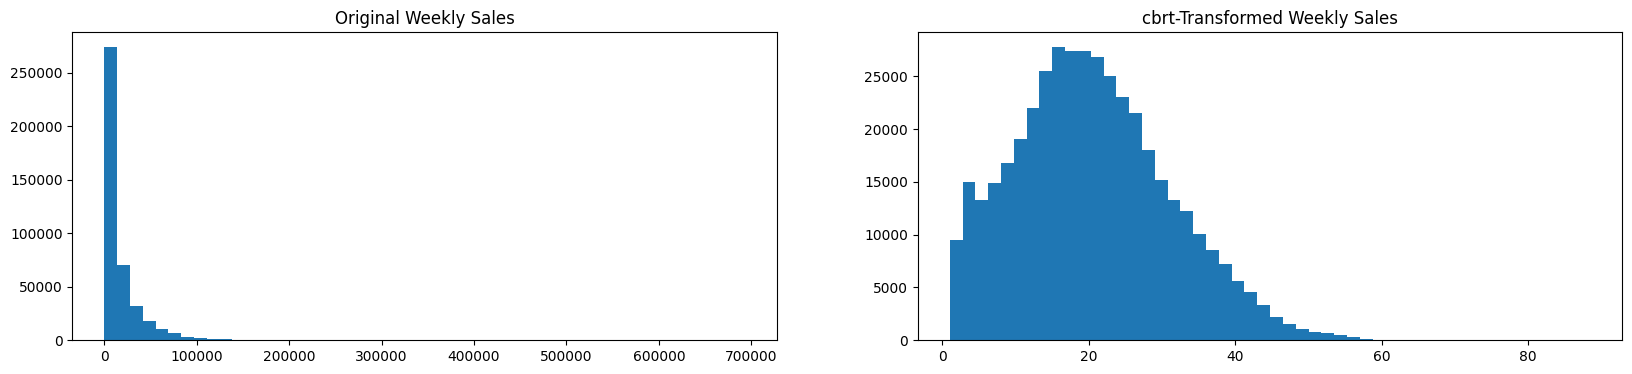

In [14]:
# Add a small constant to avoid log(0)
train_merged = train_merged[train_merged["Weekly_Sales"] > 0]
train_merged['Weekly_Sales_cbrt'] = np.cbrt(train_merged['Weekly_Sales'] + 1)

# Compare distributions
plt.figure(figsize=(20,4))

plt.subplot(1, 2, 1)
plt.hist(train_merged['Weekly_Sales'], bins=50)
plt.title("Original Weekly Sales")

plt.subplot(1, 2, 2)
plt.hist(train_merged['Weekly_Sales_cbrt'], bins=50)
plt.title("cbrt-Transformed Weekly Sales")

# Calculate Q1, Q3 and IQR
Q1 = train_merged["Weekly_Sales_cbrt"].quantile(0.25)
Q3 = train_merged["Weekly_Sales_cbrt"].quantile(0.75)
IQR = Q3 - Q1

# Define limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Detect outliers
outliers_cbrt = train_merged[
    (train_merged["Weekly_Sales_cbrt"] < lower_limit) |
    (train_merged["Weekly_Sales_cbrt"] > upper_limit)
]

# Number of outliers
num_outliers = len(outliers_cbrt)
print("Number of outliers:", num_outliers)

# Percentage of outliers
percent_outliers = num_outliers / len(train_merged) * 100
print(f"Percentage of outliers: {percent_outliers:.2f}%")

plt.show()


### 🔹 Removing Duplicate Records

This step removes any **duplicate rows** from the `train_merged` dataset using `drop_duplicates()`.

- Ensures that each record in the dataset is **unique**.  
- Helps prevent data redundancy and bias during analysis or model training.  
- The operation is done **in-place**, so changes are directly applied to the original dataset.


In [15]:
train_merged.drop_duplicates(inplace=True)

### 🔹 Handling Missing Values

This section creates indicator columns for missing values and fills all missing entries with zeros.

- A list of columns (`Markdown`) is defined to check for missing data.  
- For each column, a new column named `<column>_is_missing` is added:  
  - It contains **1** if the value is missing and **0** otherwise.  
- All remaining missing values in the dataset are replaced with **0** using `fillna(0)`.

This ensures the dataset has no null values and keeps track of where missing data originally existed.


In [16]:
# Define a list of markdown-related columns
Markdown = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

# Loop through each markdown column
for column in Markdown:
    # Create a new binary column indicating if the markdown value is missing (1 = missing, 0 = not missing)
    train_merged[f"{column}_is_missing"] = train_merged[column].isnull().astype(int)
    
    # Replace all NaN (missing) values in the dataset with 0 to avoid errors in further processing
    train_merged.fillna(0, inplace=True)

# Display the first few rows to confirm changes
train_merged.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,Weekly_Sales_cbrt,MarkDown1_is_missing,MarkDown2_is_missing,MarkDown3_is_missing,MarkDown4_is_missing,MarkDown5_is_missing
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315,29.211103,1,0,0,0,0
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315,35.840988,1,0,0,0,0
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315,34.648606,1,0,0,0,0
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,A,151315,26.872070,1,0,0,0,0
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,A,151315,27.947563,1,0,0,0,0


### 🔹 Checking for Missing Values

This command calculates the **total number of missing (NaN) values** in each column of the `train_merged` dataset.

- Helps identify which features contain missing data and how many values are missing.  
- Useful for deciding whether to **impute**, **remove**, or **ignore** missing entries.  
- A key step in ensuring data quality before analysis or model training.


In [17]:
train_merged.isnull().sum()

Store                   0
Dept                    0
Date                    0
Weekly_Sales            0
IsHoliday               0
Temperature             0
Fuel_Price              0
MarkDown1               0
MarkDown2               0
MarkDown3               0
MarkDown4               0
MarkDown5               0
CPI                     0
Unemployment            0
Type                    0
Size                    0
Weekly_Sales_cbrt       0
MarkDown1_is_missing    0
MarkDown2_is_missing    0
MarkDown3_is_missing    0
MarkDown4_is_missing    0
MarkDown5_is_missing    0
dtype: int64

### 🔹 Dataset Information Overview

The `info()` function provides a concise summary of the `train_merged` dataset.

- Displays the **number of rows and columns**.  
- Lists **column names**, their **data types**, and the **count of non-null values**.  
- Shows the **memory usage** of the dataset.  

This helps assess data completeness, detect missing values, and verify that each feature has the correct data type before further processing or modeling.


In [18]:
train_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 420212 entries, 0 to 421569
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Store                 420212 non-null  int64         
 1   Dept                  420212 non-null  int64         
 2   Date                  420212 non-null  datetime64[ns]
 3   Weekly_Sales          420212 non-null  float64       
 4   IsHoliday             420212 non-null  bool          
 5   Temperature           420212 non-null  float64       
 6   Fuel_Price            420212 non-null  float64       
 7   MarkDown1             420212 non-null  float64       
 8   MarkDown2             420212 non-null  float64       
 9   MarkDown3             420212 non-null  float64       
 10  MarkDown4             420212 non-null  float64       
 11  MarkDown5             420212 non-null  float64       
 12  CPI                   420212 non-null  float64       
 13  Unem

### 🔹 Statistical Summary of the Training Dataset

The `describe()` function generates a **statistical summary** of all numerical columns in the `train_merged` dataset.

- Provides key metrics such as:
  - **count** – number of non-missing values  
  - **mean** – average value  
  - **std** – standard deviation  
  - **min / max** – range of values  
  - **25%, 50%, 75%** – quartiles of the data distribution  

This summary helps identify potential outliers, detect skewed distributions, and understand the overall spread of the dataset’s numerical features.


In [19]:
train_merged.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales_cbrt,MarkDown1_is_missing,MarkDown2_is_missing,MarkDown3_is_missing,MarkDown4_is_missing,MarkDown5_is_missing
count,420212.000000,420212.000000,420212,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.000000,420212.0,420212.0,420212.0,420212.0
mean,22.195611,44.241309,2011-06-18 07:35:12.682169600,16033.114591,60.090599,3.360890,2590.323565,878.905242,468.845949,1083.534361,1662.805002,171.212496,7.960000,136749.732787,20.511952,0.642607,0.0,0.0,0.0,0.0
min,1.000000,1.000000,2010-02-05 00:00:00,0.010000,-2.060000,2.472000,0.000000,-265.760000,-29.100000,0.000000,0.000000,126.064000,3.879000,34875.000000,1.003322,0.000000,0.0,0.0,0.0,0.0
25%,11.000000,18.000000,2010-10-08 00:00:00,2120.130000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000,12.848599,0.000000,0.0,0.0,0.0,0.0
50%,22.000000,37.000000,2011-06-17 00:00:00,7661.700000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.350989,7.866000,140167.000000,19.714871,1.000000,0.0,0.0,0.0,0.0
75%,33.000000,74.000000,2012-02-24 00:00:00,20271.265000,74.280000,3.738000,2809.050000,2.400000,4.540000,425.290000,2168.040000,212.445487,8.567000,202505.000000,27.266795,1.000000,0.0,0.0,0.0,0.0
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000,88.497712,1.000000,0.0,0.0,0.0,0.0
std,12.787236,30.508819,NaN,22729.492116,18.447857,0.458519,6053.415601,5076.928566,5534.069859,3896.068938,4206.209357,39.162445,1.863879,60993.084568,10.582299,0.479233,0.0,0.0,0.0,0.0


### 🔹 Displaying Column Names of the Training Dataset

This command prints all column names in the `train_merged` dataset.

- Helps verify the presence of all expected features after preprocessing and merging steps.  
- Useful for confirming that transformations (e.g., one-hot encoding, feature creation) were applied correctly.  
- Provides an overview of available variables before proceeding to modeling or further analysis.


In [20]:
print(train_merged.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Temperature',
       'Fuel_Price', 'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4',
       'MarkDown5', 'CPI', 'Unemployment', 'Type', 'Size', 'Weekly_Sales_cbrt',
       'MarkDown1_is_missing', 'MarkDown2_is_missing', 'MarkDown3_is_missing',
       'MarkDown4_is_missing', 'MarkDown5_is_missing'],
      dtype='object')


### 🔹 Converting Date Columns to Datetime Format

This step converts the `Date` columns in both the `test` and `features` datasets to **datetime** objects using `pd.to_datetime()`.

- Ensures consistent date formatting across datasets.  
- Allows for easy extraction of date-related features (e.g., year, month, week).  
- Facilitates time-based operations such as sorting, merging, and resampling.


In [21]:
test['Date'] = pd.to_datetime(test['Date'])
features['Date'] = pd.to_datetime(features['Date'])

### 🔹 Merging Features with Store Information

This step merges the `features` dataset with the `stores` dataset using the **Store** column as the key.

- **`how='left'`** ensures all records from `features` are kept, even if no matching store information exists.  
- Adds additional store-related attributes (like type or size) to the feature dataset.  
- Creates a combined dataset named `feature_store` for further analysis.


In [22]:
feature_store = pd.merge(features, stores, on='Store', how='left')


### 🔹 Merging Test Data with Feature-Store Information

This step merges the `test` dataset with the previously created `feature_store` dataset using **Store**, **Date**, and **IsHoliday** as common keys.

- **`how='left'`** keeps all rows from the `test` dataset.  
- Integrates relevant store and feature details into the test data.  
- Produces a comprehensive dataset called `test_merged` for further processing and analysis.


In [23]:
test_merged = pd.merge(test, feature_store, on=['Store', 'Date', 'IsHoliday'], how='left')


### 🔹 Sorting the Test Dataset

This step sorts the `test_merged` dataset by **Store**, **Dept**, and **Date** in ascending order.

- Ensures records are organized chronologically within each store and department.  
- Facilitates time-series analysis and model consistency.  
- The index is reset after sorting for a clean, continuous order.


In [24]:
test_merged = test_merged.sort_values(['Store', 'Dept', 'Date']).reset_index(drop=True)


### 🔹 Handling Missing Values in Test Dataset

This step replaces all **missing values (NaN)** in the `test_merged` dataset with **0** using `fillna()`.

- Ensures the dataset contains no null entries before model prediction or evaluation.  
- Prevents potential errors during data processing or model training.  
- The operation is done **in-place**, meaning changes are applied directly to the original dataset.


In [25]:
test_merged.fillna(0, inplace=True)


### 🔹 Inspecting the Test Dataset Structure and Sample Data

This section provides an overview of the `test_merged` dataset.

- **`info()`** displays dataset details such as:
  - Number of entries and columns  
  - Column names and data types  
  - Count of non-null (non-missing) values in each column  

- **`head()`** shows the **first five rows** of the dataset, allowing a quick look at actual data samples.

Together, these commands help verify that the dataset is clean, properly formatted, and ready for analysis or modeling.


In [26]:
print(test_merged.info())
print(test_merged.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115064 entries, 0 to 115063
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   Store         115064 non-null  int64         
 1   Dept          115064 non-null  int64         
 2   Date          115064 non-null  datetime64[ns]
 3   IsHoliday     115064 non-null  bool          
 4   Temperature   115064 non-null  float64       
 5   Fuel_Price    115064 non-null  float64       
 6   MarkDown1     115064 non-null  float64       
 7   MarkDown2     115064 non-null  float64       
 8   MarkDown3     115064 non-null  float64       
 9   MarkDown4     115064 non-null  float64       
 10  MarkDown5     115064 non-null  float64       
 11  CPI           115064 non-null  float64       
 12  Unemployment  115064 non-null  float64       
 13  Type          115064 non-null  object        
 14  Size          115064 non-null  int64         
dtypes: bool(1), datet

### 🔹 Displaying Column Names of the Test Dataset

This command prints all column names in the `test_merged` dataset.

- Useful for verifying successful merges and transformations.  
- Helps confirm that expected columns (e.g., `Store`, `Date`, `IsHoliday`, and feature columns) are present.  
- Assists in checking dataset structure before further analysis or model preparation.


In [27]:
print(test_merged.columns)

Index(['Store', 'Dept', 'Date', 'IsHoliday', 'Temperature', 'Fuel_Price',
       'MarkDown1', 'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'Type', 'Size'],
      dtype='object')


### 🔹 Weekly Sales Trend Analysis

This section analyzes and visualizes weekly sales trends over time.

- **Converted `Date` column to datetime** and set it as the dataset index for resampling.  
- **Resampled sales data weekly (`'W'`)** to calculate total weekly sales.  
- Created three separate time series:  
  - `weekly_sales`: total weekly sales  
  - `holiday_sales`: sales during holidays  
  - `non_holiday_sales`: sales during non-holidays  
- **Plotted all three series** to visualize sales behavior across time.

The plot helps identify patterns such as peaks during holidays, general sales trends, and differences between holiday and non-holiday weeks.


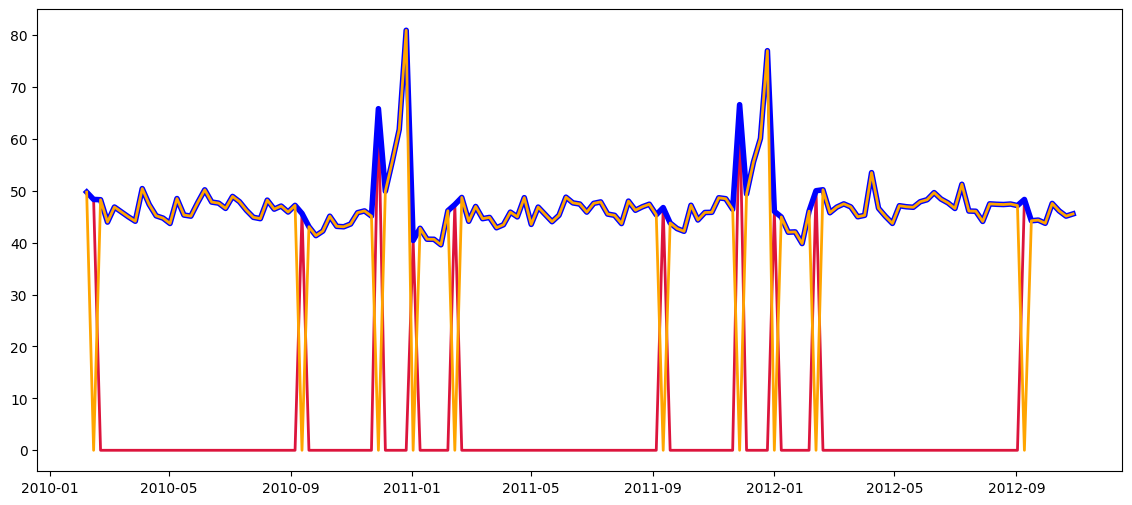

In [28]:
# Convert the 'Date' column to datetime format for proper time-based operations
train_merged['Date'] = pd.to_datetime(train_merged['Date'])

# Set 'Date' as the index to enable resampling by week
train_merged = train_merged.set_index('Date')

# Resample weekly sales (sum for each week)
weekly_sales = train_merged['Weekly_Sales'].resample('W').sum()

# Resample weekly sales for holiday weeks only
holiday_sales = train_merged[train_merged['IsHoliday'] == True]['Weekly_Sales'].resample('W').sum()

# Resample weekly sales for non-holiday weeks only
non_holiday_sales = train_merged[train_merged['IsHoliday'] == False]['Weekly_Sales'].resample('W').sum()

# Plot sales trends over time for holidays, non-holidays, and total weekly sales
plt.figure(figsize=(14,6))
plt.plot(holiday_sales.index, holiday_sales.values / 1e6, color='crimson', linewidth=2)      # Holiday sales
plt.plot(weekly_sales.index, weekly_sales.values / 1e6, color='blue', linewidth=4)           # Total weekly sales
plt.plot(non_holiday_sales.index, non_holiday_sales.values / 1e6, color="orange", linewidth=2)  # Non-holiday


### 🔹 Checking Data Types of Columns

This command displays the **data type** of each column in the `train_merged` dataset.

- Helps confirm that each column has the correct data type (e.g., `int64`, `float64`, `object`, `datetime64`).  
- Useful for detecting columns that may need type conversion before modeling or analysis.  
- Ensures compatibility with analytical functions and machine learning algorithms.


In [30]:
print(train_merged.dtypes)

Store                     int64
Dept                      int64
Weekly_Sales            float64
IsHoliday                  bool
Temperature             float64
Fuel_Price              float64
MarkDown1               float64
MarkDown2               float64
MarkDown3               float64
MarkDown4               float64
MarkDown5               float64
CPI                     float64
Unemployment            float64
Type                     object
Size                      int64
Weekly_Sales_cbrt       float64
MarkDown1_is_missing      int64
MarkDown2_is_missing      int64
MarkDown3_is_missing      int64
MarkDown4_is_missing      int64
MarkDown5_is_missing      int64
dtype: object


### 🔹 Correlation Analysis of Numerical Features

This step explores the relationships between numerical variables in the dataset.

- Selected only **numerical columns** (`int64` and `float64` types).  
- Dropped the columns indicating missing values (`MarkDown*_is_missing`) to avoid noise.  
- Computed the **correlation matrix** using `.corr()` to measure linear relationships.  
- Visualized the correlations using a **heatmap** with annotated values for better interpretation.

The heatmap helps identify strongly correlated features, which can guide feature selection and detect potential multicollinearity issues.


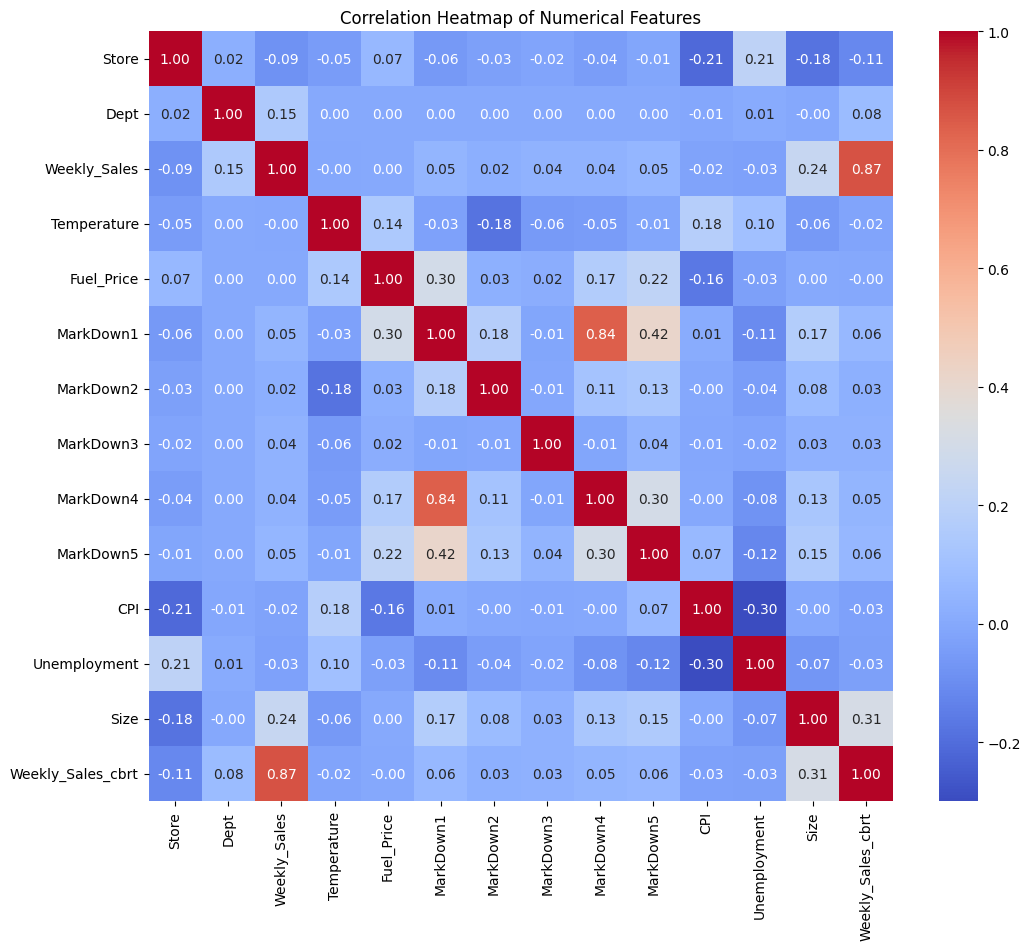

In [31]:
# Select only numerical columns (integers and floats) from the dataset
numerical_data = train_merged.select_dtypes(["int64", "float64"])

# Remove the 'is_missing' columns since they are binary indicators, not actual numerical features
numerical_data = numerical_data.drop(columns=["MarkDown1_is_missing", "MarkDown2_is_missing",
                                               "MarkDown3_is_missing", "MarkDown4_is_missing",
                                               "MarkDown5_is_missing"])

# Compute the correlation matrix between all numerical variables
correlation_matrixx = numerical_data.corr()

# Plot a heatmap to visualize correlations between numerical features
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrixx, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


### 🔹 Relationship Between Temperature and Weekly Sales

This section examines how **temperature variations** affect weekly sales.

- Defined **temperature bins** and calculated their **midpoints** for labeling.  
- Used `pd.cut()` to categorize the `Temperature` column into defined ranges (`temp_sales`).  
- Grouped the data by temperature range and calculated the **average weekly sales** for each group.  
- Created a **line plot** to visualize how sales change across temperature intervals.

This visualization helps identify whether sales increase or decrease under certain temperature conditions, revealing potential seasonal or weather-related sales trends.


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_2956\2932898457.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_sales_grouped = train_merged.groupby("temp_sales")["Weekly_Sales"].mean()


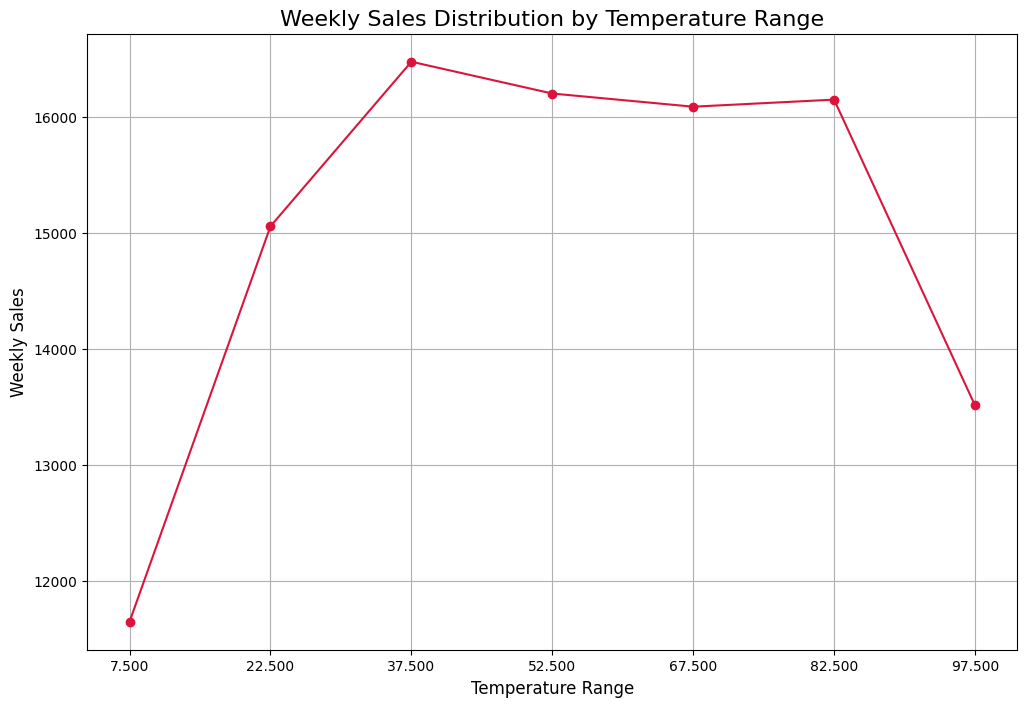

In [32]:
temp_sales_bins = [0, 15, 30, 45, 60, 75, 90, 105, 120, 135, 150]

# Calculate the midpoints of each temperature range for labeling
midpointss = [(temp_sales_bins[i] + temp_sales_bins[i+1])/2
               for i in range(len(temp_sales_bins) - 1)]

# Format the midpoints as strings with 3 decimal places
temp_sales_labels = [f'{m:.3f}' for m in midpointss]

# Categorize 'Temperature' values into the defined bins with custom midpoint labels
train_merged['temp_sales'] = pd.cut(train_merged['Temperature'], bins=temp_sales_bins, 
                                    labels=temp_sales_labels, include_lowest=True)

# Calculate the average weekly sales for each temperature group
temp_sales_grouped = train_merged.groupby("temp_sales")["Weekly_Sales"].mean()

# Plot the relationship between temperature ranges and average weekly sales
plt.figure(figsize=(12, 8))
plt.plot(temp_sales_grouped.index, temp_sales_grouped.values , marker='o', linestyle='-', color='crimson')
plt.title('Weekly Sales Distribution by Temperature Range', fontsize=16)
plt.xlabel('Temperature Range', fontsize=12)
plt.ylabel('Weekly Sales', fontsize=12)
plt.grid()
plt.show()


### 🔹 Checking Fuel Price Range

This step identifies the **maximum** and **minimum** fuel prices in the dataset.

- `max()` returns the highest recorded fuel price.  
- `min()` returns the lowest recorded fuel price.  
- The results are printed to show the range of fuel price variation.

Understanding the fuel price range helps in interpreting its potential impact on weekly sales and economic conditions during the analyzed period.


In [33]:
max_fuel_price = train_merged['Fuel_Price'].max() 
min_fuel_price = train_merged['Fuel_Price'].min()

print(f"Maxmium fuel price: {max_fuel_price} while minimum fuel price: {min_fuel_price}")

Maxmium fuel price: 4.468 while minimum fuel price: 2.472


### 🔹 Relationship Between Fuel Price and Weekly Sales

This section analyzes how changes in **fuel prices** relate to weekly sales performance.

- Created **fuel price bins** and calculated **midpoints** for labeling.  
- Used `pd.cut()` to group `Fuel_Price` values into corresponding price ranges.  
- Computed the **average weekly sales** for each fuel price group using `groupby()`.  
- Plotted a **line chart** showing how sales vary with different fuel price levels.

This visualization helps identify potential patterns or correlations between fuel costs and sales — for example, whether higher fuel prices correspond to lower weekly sales.


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_2956\2092749310.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fuel_sales_grouped = train_merged.groupby("Fuel_Price_Group")["Weekly_Sales"].mean()


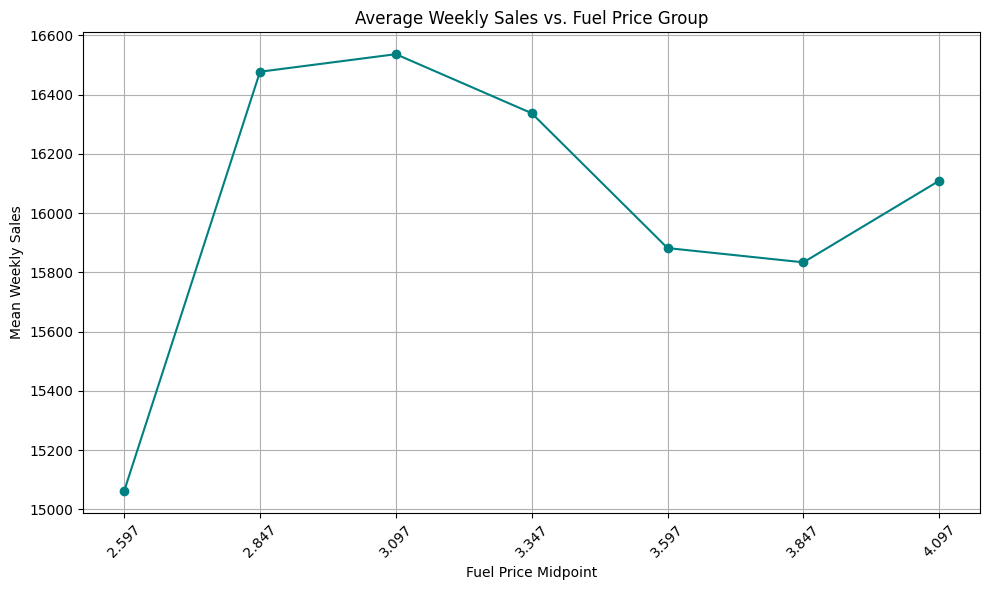

In [34]:
fuel_sales_bins = [2.472 , 2.722 , 2.972 , 3.222, 3.472, 3.722, 3.972, 4.222]

# Calculate midpoints for each fuel price range (used as labels later)
midpoints = [(fuel_sales_bins[i] + fuel_sales_bins[i+1]) / 2
            for i in range(len(fuel_sales_bins) - 1)]

# Format midpoints to 3 decimal places for labeling
fuel_sales_labels = [f'{m:.3f}' for m in midpoints]

# Categorize 'Fuel_Price' values into bins with custom labels
train_merged['Fuel_Price_Group'] = pd.cut(train_merged['Fuel_Price'],   bins=fuel_sales_bins,  labels=fuel_sales_labels, include_lowest=True)

# Compute average weekly sales for each fuel price group
fuel_sales_grouped = train_merged.groupby("Fuel_Price_Group")["Weekly_Sales"].mean()

# Plot relationship between fuel price groups and average weekly sales
plt.figure(figsize=(10,6))
plt.plot(fuel_sales_grouped.index, fuel_sales_grouped.values, marker='o',linestyle='-',color='teal')
plt.xlabel('Fuel Price Midpoint')
plt.ylabel('Mean Weekly Sales')
plt.title('Average Weekly Sales vs. Fuel Price Group')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 🔹 Store Distribution Analysis

This section visualizes the distribution of records across different stores.

- Plotted a **histogram** of the `Store` column to show how many entries each store has.  
- Highlighted the **store with the maximum records** in teal and the **store with the minimum records** in gold.  
- Added gridlines and axis labels for better readability.  

This plot helps identify data imbalance — for example, whether some stores have significantly more sales records than others.


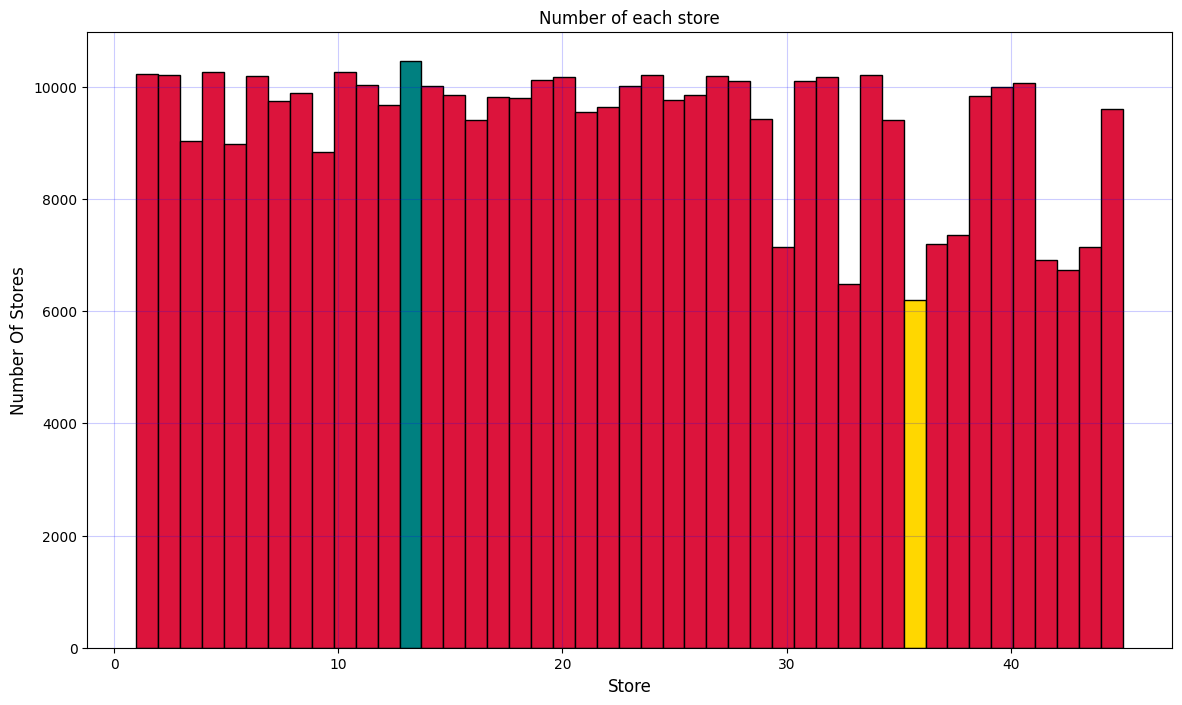

In [35]:
plt.figure(figsize=(14,8))
n , bins , patches = plt.hist(train_merged["Store"] , bins=45 , edgecolor='black',color='crimson')

# Get index of bars with the highest and lowest frequencies
max_index = np.argmax(n)
min_index = np.argmin(n)

# Change colors of the highest and lowest bars
patches[max_index].set_facecolor('teal')
patches[min_index].set_facecolor('gold')

plt.grid(True , color='blue' , alpha=0.2)
plt.xlabel("Store" , fontsize=12)
plt.ylabel("Number Of Stores", fontsize=12)
title_objj = plt.title("Number of each store", fontsize=12)


### 🔹 Weekly Consumer Price Index (CPI) Trend

This section visualizes changes in the **Consumer Price Index (CPI)** over time.

- Resampled the `CPI` column weekly (`'W'`) to calculate the **sum** of CPI values per week.  
- Plotted a **line chart** to show how CPI fluctuates throughout the analyzed period.  
- Added axis labels and a descriptive title for clarity.  

This visualization helps identify **economic trends** and potential **inflation effects** that may influence weekly sales performance.


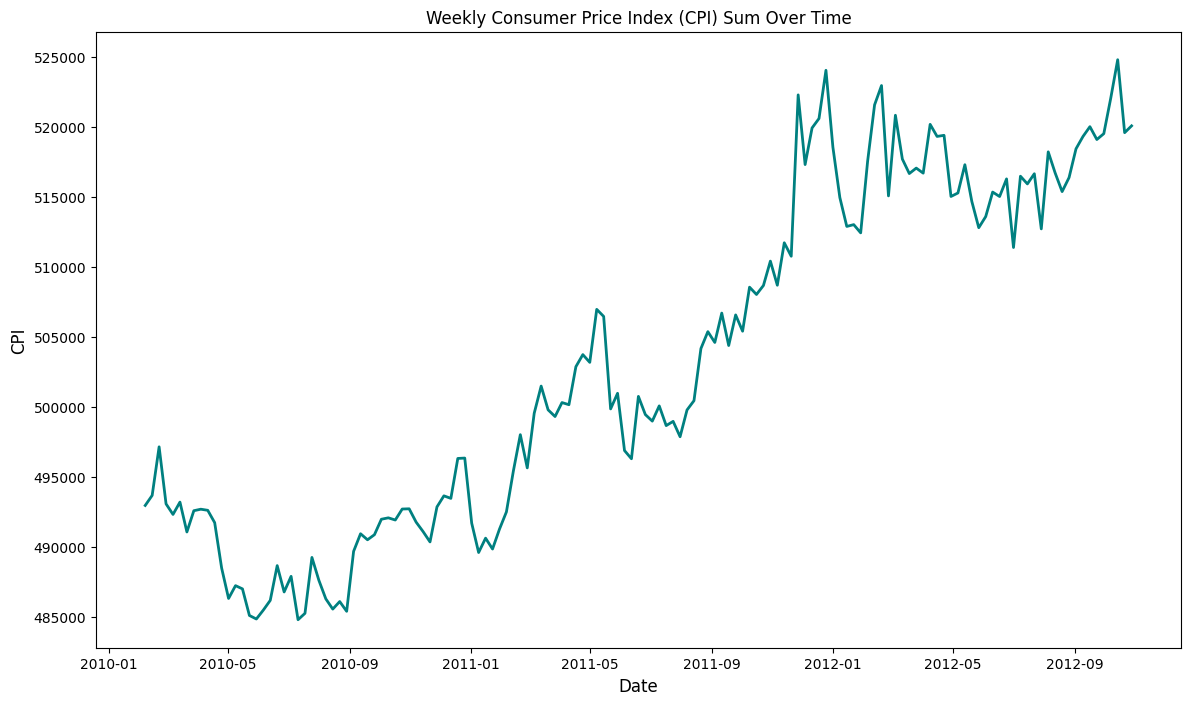

In [36]:
cpi = train_merged["CPI"].resample('W').sum()
plt.figure(figsize=(14,8))
plt.plot(cpi.index , cpi.values , color='teal', linewidth=2)
plt.xlabel("Date", fontsize=12)
plt.ylabel("CPI", fontsize=12)
title_obj = plt.title("Weekly Consumer Price Index (CPI) Sum Over Time" , fontsize=12)

### 🔹 One-Hot Encoding of Categorical Feature

This step converts the categorical column **`Type`** into multiple binary (dummy) columns using **one-hot encoding**.

- Each unique store type becomes a separate column (e.g., `Type_A`, `Type_B`, etc.).  
- A value of **1** indicates the store belongs to that type, while **0** means it does not.  
- The prefix `"Type"` is added to each new column for clarity.  

This transformation allows machine learning models to effectively use categorical data in numerical form.


In [37]:
train_merged = pd.get_dummies(train_merged , columns=["Type"] , prefix="Type")


### 🔹 Displaying the First Few Rows of the Dataset

The `head()` function is used to display the **first five rows** of the `train_merged` dataset.

- Helps verify recent transformations such as one-hot encoding and column additions.  
- Useful for a quick inspection of data structure, column names, and sample values.  
- Ensures that preprocessing steps were applied correctly before further analysis.


In [38]:
train_merged.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales_cbrt,MarkDown1_is_missing,MarkDown2_is_missing,MarkDown3_is_missing,MarkDown4_is_missing,MarkDown5_is_missing,temp_sales,Fuel_Price_Group,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,29.211103,1,0,0,0,0,37.500,2.597,True,False,False
2010-02-12,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,35.840988,1,0,0,0,0,37.500,2.597,True,False,False
2010-02-19,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,34.648606,1,0,0,0,0,37.500,2.597,True,False,False
2010-02-26,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,26.872070,1,0,0,0,0,52.500,2.597,True,False,False
2010-03-05,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,27.947563,1,0,0,0,0,52.500,2.597,True,False,False


### 🔹 Handling Missing Markdown Data in Test Dataset

- Defined a list of markdown columns (`MarkDown1` to `MarkDown5`).  
- Created **binary indicator columns** for each markdown to show missing values:  
  - `1` → value is missing  
  - `0` → value is present  
- Replaced all remaining missing values with **0** to avoid errors during analysis or modeling.  
- Displayed the first few rows to verify the changes.


In [39]:
# Define a list of markdown-related columns
Markdown = ["MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"]

# Loop through each markdown column
for column in Markdown:
    # Create a new binary column indicating if the markdown value is missing (1 = missing, 0 = not missing)
    test_merged[f"{column}_is_missing"] = test_merged[column].isnull().astype(int)
    
    # Replace all NaN (missing) values in the dataset with 0 to avoid errors in further processing
    test_merged.fillna(0, inplace=True)

# Display the first few rows to confirm changes
test_merged.head()


,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size,MarkDown1_is_missing,MarkDown2_is_missing,MarkDown3_is_missing,MarkDown4_is_missing,MarkDown5_is_missing
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,A,151315,0,0,0,0,0
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,A,151315,0,0,0,0,0
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,A,151315,0,0,0,0,0
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,A,151315,0,0,0,0,0
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,A,151315,0,0,0,0,0


### 🔹 One-Hot Encoding Store Type in Test Dataset

- Converted the categorical column **`Type`** into multiple **binary columns** using one-hot encoding.  
- Each new column represents a store type (e.g., `Type_A`, `Type_B`, `Type_C`).  
- A value of **1** indicates the store belongs to that type, **0** otherwise.  
- The `prefix="Type"` ensures the new columns are clearly labeled.


In [40]:
test_merged = pd.get_dummies(test_merged , columns=["Type"] , prefix="Type")


### 🔹 Previewing the Test Dataset

- Displayed the first few rows of `test_merged` to inspect recent transformations.  
- Useful to verify **one-hot encoding**, missing value handling, and column structure.  
- Confirms that the dataset is ready for further analysis or model predictions.


In [41]:
test_merged.head()

,Store,Dept,Date,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,MarkDown1_is_missing,MarkDown2_is_missing,MarkDown3_is_missing,MarkDown4_is_missing,MarkDown5_is_missing,Type_A,Type_B,Type_C
0,1,1,2012-11-02,False,55.32,3.386,6766.44,5147.70,50.82,3639.90,2737.42,223.462779,6.573,151315,0,0,0,0,0,True,False,False
1,1,1,2012-11-09,False,61.24,3.314,11421.32,3370.89,40.28,4646.79,6154.16,223.481307,6.573,151315,0,0,0,0,0,True,False,False
2,1,1,2012-11-16,False,52.92,3.252,9696.28,292.10,103.78,1133.15,6612.69,223.512911,6.573,151315,0,0,0,0,0,True,False,False
3,1,1,2012-11-23,True,56.23,3.211,883.59,4.17,74910.32,209.91,303.32,223.561947,6.573,151315,0,0,0,0,0,True,False,False
4,1,1,2012-11-30,False,52.34,3.207,2460.03,0.00,3838.35,150.57,6966.34,223.610984,6.573,151315,0,0,0,0,0,True,False,False


### 🔹 Previewing the Training Dataset

- Displayed the first few rows of `train_merged` to inspect the dataset after preprocessing.  
- Useful to check **missing value indicators**, **one-hot encoded columns**, and overall data structure.  
- Ensures that all transformations are correctly applied before analysis or modeling.


In [42]:
train_merged.head()

,Store,Dept,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size,Weekly_Sales_cbrt,MarkDown1_is_missing,MarkDown2_is_missing,MarkDown3_is_missing,MarkDown4_is_missing,MarkDown5_is_missing,temp_sales,Fuel_Price_Group,Type_A,Type_B,Type_C
Date,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,1,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,151315,29.211103,1,0,0,0,0,37.500,2.597,True,False,False
2010-02-12,1,1,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,151315,35.840988,1,0,0,0,0,37.500,2.597,True,False,False
2010-02-19,1,1,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,151315,34.648606,1,0,0,0,0,37.500,2.597,True,False,False
2010-02-26,1,1,19403.54,False,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,151315,26.872070,1,0,0,0,0,52.500,2.597,True,False,False
2010-03-05,1,1,21827.90,False,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,151315,27.947563,1,0,0,0,0,52.500,2.597,True,False,False
